# Laboratorio 5 Grupal.
### Nombres:
###          - Aramayo Valdez Joaquin.
###          - Piza Nava Vladimir.
###          - Viza Hoyos Maria Belen.
###          - Mendoza Ovando Carlos Saul.
###          - Solorzano Diego.
### Link Dataset: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset?select=list_eval_partition.csv
### Link GitHub:


## PUNTO 1 :
#### 1.   Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 10, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo.
#### 2.   Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo.




### Iniciamos creando una funcion que nos ayudará con la generacion de centroides aleatorios separados entre si.

In [39]:
import numpy as np

def generate_centroids(num_centroids, spread=5):
    centroids = []  # Lista para almacenar los centroides generados
    for _ in range(num_centroids):
        # Genera un nuevo centroide aleatorio
        while True:
            new_centroid = np.random.rand(2) * spread  # Genera un punto aleatorio en 2D
            # Verifica que el nuevo centroide esté a más de 1.5 unidades de los ya generados
            if all(np.linalg.norm(new_centroid - np.array(c)) > 1.5 for c in centroids):
                centroids.append(new_centroid)  # Añade el nuevo centroide a la lista
                break  # Sale del bucle si el centroide es válido
    return np.array(centroids)  # Devuelve los centroides como un array de NumPy


### Aqui lo que estamos haciendo es usar la funcion que creamos anteriormente y tambien crear nuestros datos sintéticos (X).

In [40]:
from sklearn.datasets import make_blobs
import random

# Definir el número de centroides entre 1 y 10
num_centroids = random.randint(1, 10)
print(f"Generando {num_centroids} centroides.")

# Generar los centroides
blob_centers = generate_centroids(num_centroids)

# Definir la desviación estándar para cada cluster
blob_std = np.array([0.4] * num_centroids)

# Generar los datos sintéticos
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


# mostramos los centroides.
print("Centroides generados:")
print(blob_centers)

Generando 4 centroides.
Centroides generados:
[[2.12240751 3.73500827]
 [0.04985478 4.58361336]
 [0.52222161 0.70423277]
 [4.68215834 2.00956662]]


### Graficamos los datos generados (x1, x2)

In [41]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    #plt.scatter(blob_centers[:, 0], blob_centers[:, 1],
    #        s=200, color='red', marker='X')  # Mostrar los centroides

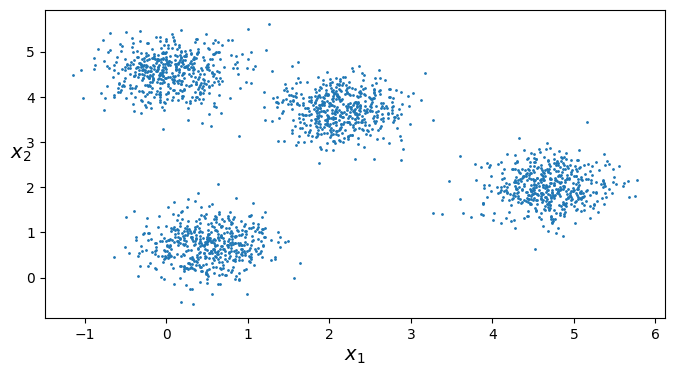

In [42]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Graficamos los datos generados pero ahora juntamente con los centroides ya entrenados.

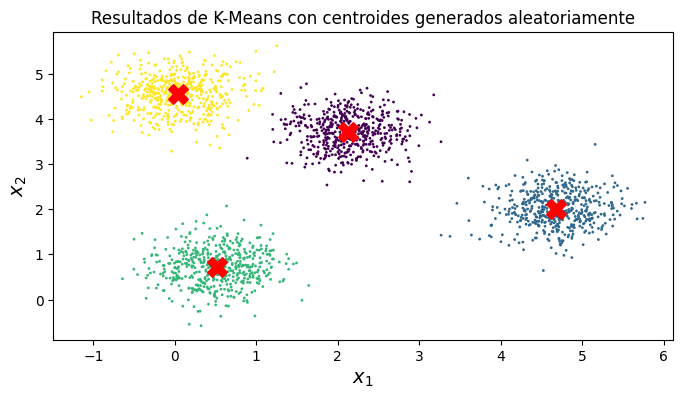

array([1, 2, 0, ..., 1, 0, 2])

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=num_centroids, random_state=42)
y_pred = kmeans.fit_predict(X)

# Visualizar los resultados
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, color='red', marker='X')  # Mostrar los centroides
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.title("Resultados de K-Means con centroides generados aleatoriamente")
plt.show()
y_pred


In [44]:
# Centroides ya entrenados.
kmeans.cluster_centers_

array([[2.12693178, 3.70828241],
       [4.67947527, 2.00530411],
       [0.51409804, 0.72234976],
       [0.03979055, 4.5521888 ]])

### Graficamos las fronteras de decision entre clusters, esto para ver como fue la division del espacio.

In [45]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

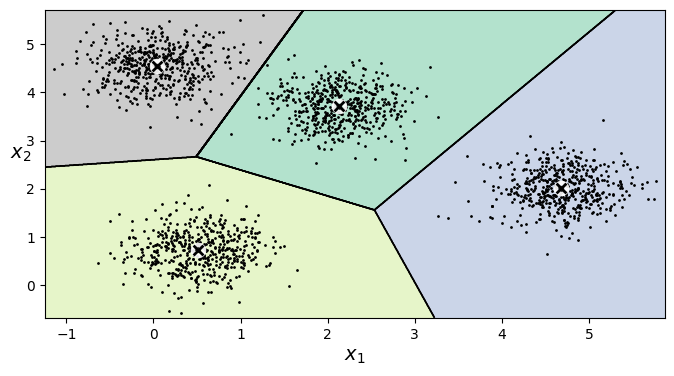

In [46]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Entrenamos tres modelos K-Means con 1, 2 y 3 iteraciones, usando k-means++ y el algoritmo elkan para comparar los resultados de cada iteración.

In [47]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=1, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=4, n_init=1, random_state=1)

### Graficamos la evolucion del algoritmo K-Means durante las 3 interaciones que hicimos anteriormente. Esto para asi ver cómo los centroides y las fronteras de decisión cambian conforme el algoritmo ajusta los grupos

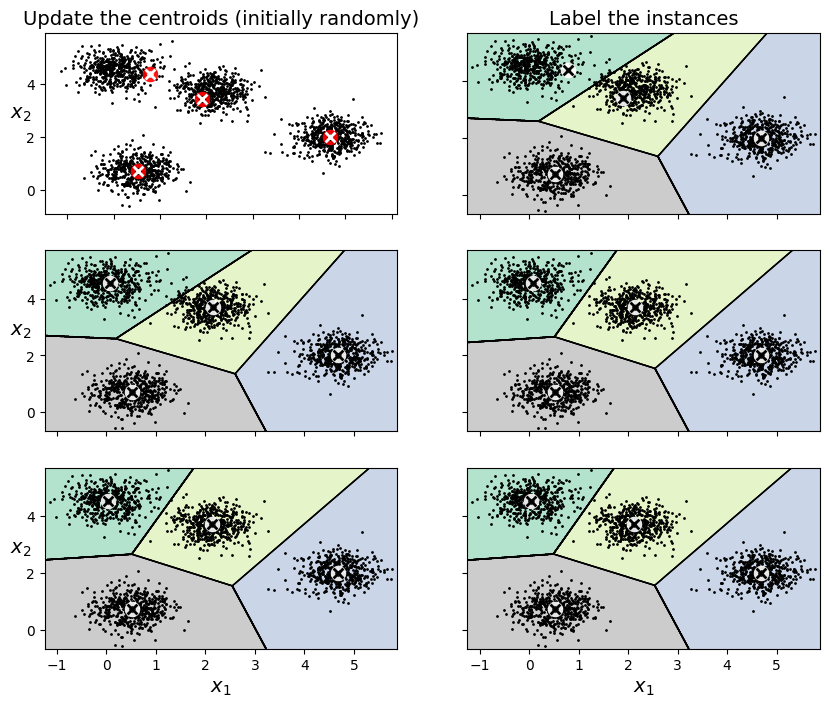

In [48]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### Lo que haremos ahora sera comparar 2 modelos K-Means con diferentes inicializaciones aleatorias, mostrando sus respectivas fronteras de decisión. Esto permite observar cómo afecta la inicialización a los resultados del clustering.

In [49]:
# Función para comparar dos modelos de clustering K-Means en el mismo conjunto de datos
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Entrena el primer modelo en los datos X
    clusterer1.fit(X)
    # Entrena el segundo modelo en los datos X
    clusterer2.fit(X)

    # Configuración del tamaño de la figura para las gráficas
    plt.figure(figsize=(10, 3.2))

    # Primer subplot: gráfica de las fronteras de decisión del primer modelo
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)  # Función que grafica las fronteras del clusterer
    if title1:
        plt.title(title1, fontsize=14)  # Añade el título si se proporciona uno

    # Segundo subplot: gráfica de las fronteras de decisión del segundo modelo
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)  # Sin etiquetas de eje Y
    if title2:
        plt.title(title2, fontsize=14)  # Añade el título si se proporciona uno

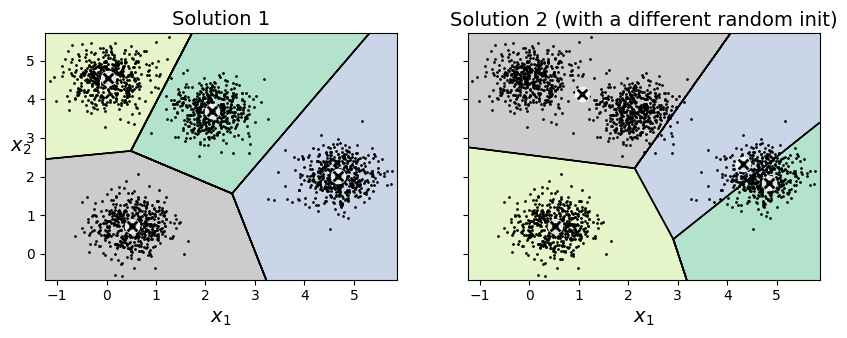

In [50]:
# Configuración de dos modelos K-Means con diferentes inicializaciones aleatorias
kmeans_rnd_init1 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                          algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                          algorithm="elkan", random_state=19)

# Comparación visual de los dos modelos con diferentes inicializaciones
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")

# Muestra las gráficas
plt.show()

### Procedemos a entrenar un modelo K-Means utilizando 10 inicializaciones aleatorias y visualiza las fronteras de decisión del clustering. Esto ayuda a observar la estabilidad y la variabilidad en los resultados del agrupamiento.

In [51]:
# Configuración de un modelo K-Means con 10 inicializaciones aleatorias
kmeans_rnd_10_inits = KMeans(n_clusters=num_centroids, init="random", n_init=10,
                              algorithm="elkan", random_state=11)

# Entrena el modelo K-Means en los datos X
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=4, n_init=10,
       random_state=11)

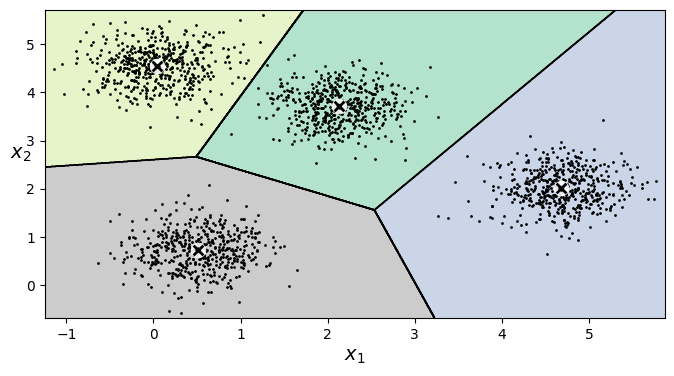

In [52]:
# Configuración de la figura para la visualización de las fronteras de decisión
plt.figure(figsize=(8, 4))
# Función que grafica las fronteras de decisión del modelo K-Means
plot_decision_boundaries(kmeans_rnd_10_inits, X)

# Muestra la gráfica generada
plt.show()

### Mostramos el Silhouette Score para evaluar la calidad del clustering generado por el modelo K-Means. Un valor más alto indica que los clusters están bien definidos y son distintos entre sí.

In [53]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.7334988736189141

### Graficamos el Silhuette Score para diferentes valores de k (número de clusters) en el rango de 2 a 20. La gráfica resultante ayuda a identificar el número óptimo de clusters para el modelo K-Means, donde un índice de silueta más alto indica una mejor calidad de agrupamiento.

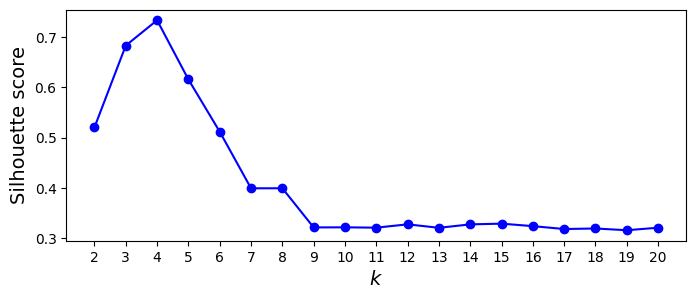

In [54]:
# Calcula los modelos y las puntuaciones de silueta para k desde 2 hasta 20
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)  # Ajusta K-Means para cada k
                for k in range(2, 21)]  # Rango modificado para k=2 a k=20

# Calcula el índice de silueta para cada modelo entrenado
silhouette_scores = [silhouette_score(X, model.labels_)  # Obtiene etiquetas de cada modelo
                     for model in kmeans_per_k]

# Configuración de la figura para la gráfica del índice de silueta
plt.figure(figsize=(8, 3))
# Grafica el índice de silueta en función del número de clusters k
plt.plot(range(2, 21), silhouette_scores, "bo-")  # Rango modificado para la gráfica
plt.xlabel("$k$", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Silhouette score", fontsize=14)  # Etiqueta del eje Y
# Ajusta los ticks del eje X para mostrar valores de k desde 2 hasta 20
plt.xticks(np.arange(2, 21, 1))  # Crea ticks desde 2 hasta 20 con paso de 1
plt.show()  # Muestra la gráfica

### Generamos graficos de coeficientes de silueta para diferentes valores de k (número de clusters) en el modelo K-Means. Cada gráfico muestra la distribución de los coeficientes de silueta por cluster, lo que permite visualizar la calidad del agrupamiento para cada valor de k.

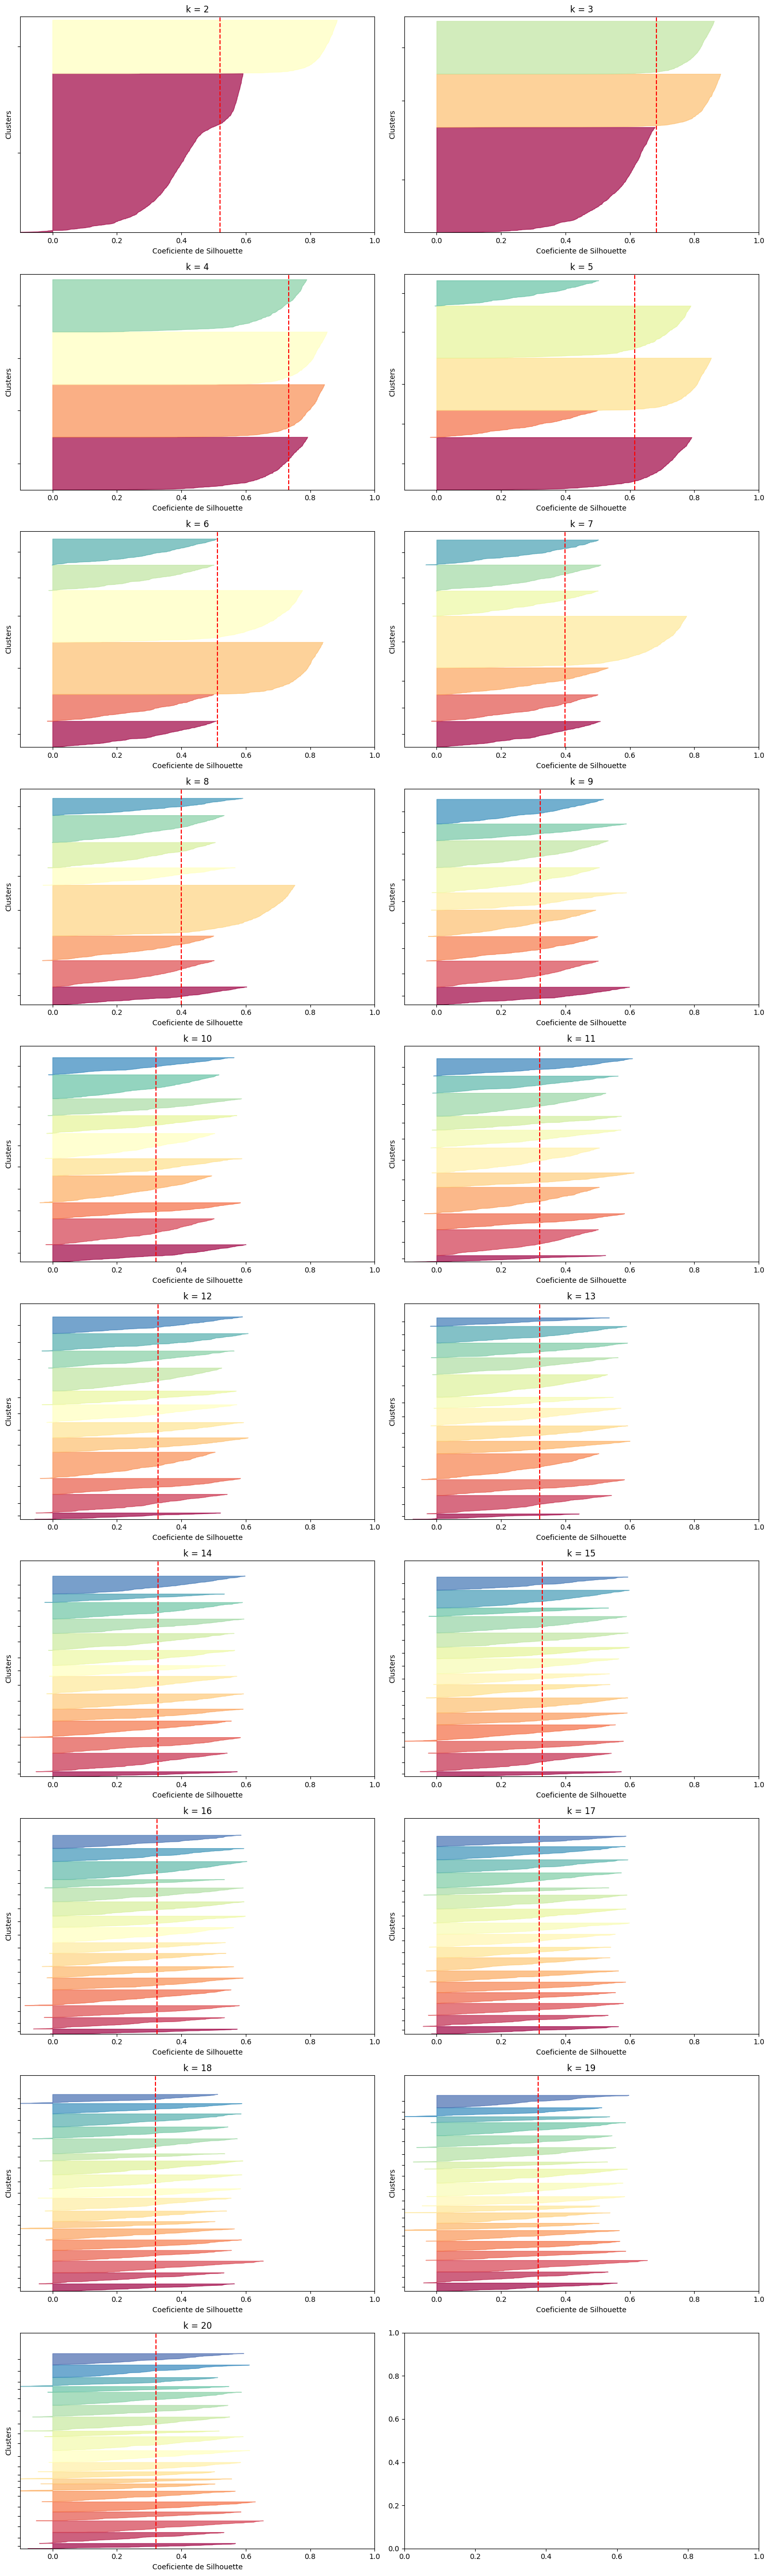

In [55]:
# Importa las métricas necesarias para calcular los coeficientes de silueta
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que ya tienes kmeans_per_k y silhouette_scores calculados

# Obtener el rango de valores de k
k_values = range(2, len(kmeans_per_k) + 2)  # k empieza en 2

# Crear subplots para cada valor de k
num_plots = len(k_values)
num_rows = int(np.ceil(num_plots / 2))  # Calcula el número de filas para subplots
num_cols = 2  # Dos columnas de subplots

# Crea la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.4)  # Ajusta el espacio entre subplots

# Iterar sobre los valores de k y crear gráficos de silueta
for i, k in enumerate(k_values):
    ax = axes[i // num_cols, i % num_cols]  # Obtiene el subplot actual
    y_pred = kmeans_per_k[i].labels_  # Obtiene las etiquetas del modelo K-Means
    silhouette_vals = silhouette_samples(X, y_pred)  # Calcula los coeficientes de silueta

    y_ticks = []
    y_lower, y_upper = 0, 0  # Inicializa límites para los clusters
    for cluster in range(k):
        # Extrae y ordena los coeficientes de silueta para cada cluster
        cluster_silhouette_vals = silhouette_vals[y_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)  # Actualiza el límite superior
        color = mpl.cm.Spectral(cluster / k)  # Asigna color basado en el cluster
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)  # Grafica el área del cluster
        y_ticks.append((y_lower + y_upper) / 2)  # Añade tick al eje Y
        y_lower = y_upper  # Actualiza el límite inferior

    # Dibuja una línea vertical indicando el promedio del coeficiente de silueta
    ax.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    ax.set_yticks(y_ticks)  # Establece los ticks en el eje Y
    ax.set_yticklabels([])  # Elimina las etiquetas del eje Y
    ax.set_xlim([-0.1, 1])  # Establece límites en el eje X
    ax.set_ylim([0, len(X) + (k + 1) * 10])  # Establece límites en el eje Y
    ax.set_title(f"k = {k}")  # Título del subplot
    ax.set_xlabel("Coeficiente de Silhouette")  # Etiqueta del eje X
    ax.set_ylabel("Clusters")  # Etiqueta del eje Y

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()  # Muestra la figura


### Demostración de la efectividad del modelo.

In [56]:
# Mostrar el índice de silueta
print(f'Índice de Silueta: {silhouette_score(X, kmeans.labels_)}')

Índice de Silueta: 0.7334988736189141


### Este valor está entre 0 y 1, donde valores cercanos a 1 (valor > 0.5) indican que los puntos están bien agrupados y distanciados de otros clusters.

## PUNTO 2:



*   Buscar un dataset que no tenga etiquetas, que tenga un n mayor a 10 y un m mayor a 10.000 ejemplos, tendrá mayores puntajes, datasets que tengan contenido gráfico, audio, textos o datos que muestre efectos reales en cualquier ámbito.
*   Los datasets no deben ser similares para ello deben coordinar esto con el universitario Aly Delgado Danner Abel.

*   Aplicar aprendizaje semisupervisado
*   Aplicar aprendizaje activo











### Cargar Imágenes y Dividir Datos
#### En este bloque, cargamos las imágenes y las etiquetas desde el archivo CSV que estan en la ruta anterior. Cada imagen se redimensiona a 64x64 píxeles para reducir la complejidad. Luego, se normalizan dividiendo los valores de los píxeles entre 255 para que estén entre 0 y 1. Por último, dividimos los datos en entrenamiento y prueba para evaluar el rendimiento del modelo de forma imparcial.

In [61]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

IMAGES_PATH = "img_align_celeba/"
ATTRIBUTES_CSV = "list_attr_celeba.csv"

celeba = pd.read_csv(ATTRIBUTES_CSV).head(1000)

def load_image(img_name, target_size=(64, 64)):
    img = Image.open(os.path.join(IMAGES_PATH, img_name)).resize(target_size)
    return np.array(img) / 255.0

X = np.array([load_image(img) for img in celeba['image_id']])
y = celeba['Male'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Comprobamos que no existan valores nulos en nuestro dataset y observamos las etiquetas.

In [62]:
celeba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_id             1000 non-null   object
 1   5_o_Clock_Shadow     1000 non-null   int64 
 2   Arched_Eyebrows      1000 non-null   int64 
 3   Attractive           1000 non-null   int64 
 4   Bags_Under_Eyes      1000 non-null   int64 
 5   Bald                 1000 non-null   int64 
 6   Bangs                1000 non-null   int64 
 7   Big_Lips             1000 non-null   int64 
 8   Big_Nose             1000 non-null   int64 
 9   Black_Hair           1000 non-null   int64 
 10  Blond_Hair           1000 non-null   int64 
 11  Blurry               1000 non-null   int64 
 12  Brown_Hair           1000 non-null   int64 
 13  Bushy_Eyebrows       1000 non-null   int64 
 14  Chubby               1000 non-null   int64 
 15  Double_Chin          1000 non-null   int64 
 16  Eyeglas

### Aprendizaje Semi-supervisado.
#### Clustering K-Means
#### El algoritmo K-Means agrupa las imágenes en k clusters según la similitud entre ellas. Como K-Means necesita vectores de entrada, las imágenes se aplanan (de 64x64x3 a 12,288 elementos por imagen). Esto nos permite identificar patrones comunes entre las imágenes y agruparlas en categorías similares sin necesidad de etiquetas.

In [63]:
from sklearn.cluster import KMeans  # Importa el modelo K-Means de la biblioteca sklearn

# Aplanar las imágenes para usarlas con K-Means
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Convierte cada imagen 2D en un vector 1D

k = 50  # Define el número de clusters que se desea encontrar
kmeans = KMeans(n_clusters=k, random_state=42)  # Inicializa el modelo K-Means con k clusters y un estado aleatorio fijo
X_train_dist = kmeans.fit_transform(X_train_flat)  # Ajusta el modelo a los datos y calcula las distancias a los centroides


### Selecionas imágenes representativas.
#### De cada cluster, seleccionamos la imagen más cercana al centroide como representativa del cluster. Estas imágenes reflejan las características promedio de las imágenes en su grupo. Al trabajar con estas imágenes representativas, podemos reducir la cantidad de datos a procesar sin perder mucha información relevante.

In [64]:
# Encuentra los índices de las imágenes más cercanas a cada centroide de cluster
idxs = np.argmin(X_train_dist, axis=0)  # Índices de las imágenes representativas para cada cluster

# Extrae las imágenes representativas utilizando los índices encontrados
X_representative_images = X_train[idxs]  # Imágenes representativas por cluster


### Visualizar Imágenes Representativas
#### Este bloque muestra las imágenes representativas de cada cluster en una cuadrícula, facilitando la interpretación visual de los patrones encontrados por K-Means. Esta visualización nos permite verificar si los clusters tienen sentido y reflejan similitudes significativas.

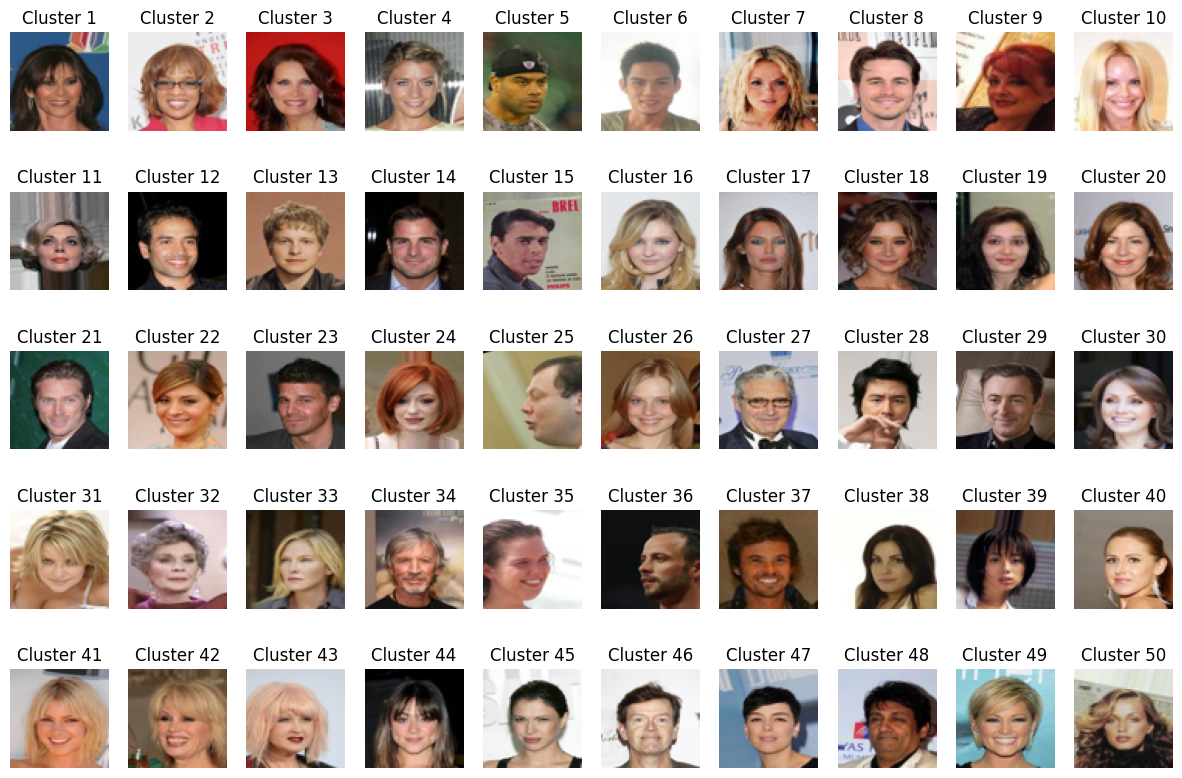

In [65]:
import matplotlib.pyplot as plt  # Importa la biblioteca para la visualización

# Crea una figura para mostrar las imágenes representativas
plt.figure(figsize=(15, 10))  # Establece el tamaño de la figura

# Itera sobre las imágenes representativas y su índice
for i, img in enumerate(X_representative_images):
    plt.subplot(5, 10, i + 1)  # Crea un subgráfico para cada imagen (5 filas y 10 columnas)
    plt.imshow(img)  # Muestra la imagen en el subgráfico
    plt.axis('off')  # Desactiva los ejes para una mejor visualización
    plt.title(f"Cluster {i+1}")  # Asigna un título al subgráfico indicando el número del cluster

# Muestra la figura con todas las imágenes
plt.show()


### Etiquetas de Imágenes Representativas
#### Aquí obtenemos las etiquetas reales de las imágenes seleccionadas como representativas. Por ejemplo, verificamos si las imágenes representan a ‘Hombre’ o ‘No Hombre’ según la etiqueta disponible en el dataset.

In [66]:
y_representative = y_train[idxs]  # Etiquetas de las imágenes representativas

### Entrenar con imágenes representativas.
#### Se entrena un modelo de regresión logística utilizando únicamente las imágenes representativas. Esto simplifica el entrenamiento al reducir la cantidad de datos, aprovechando las imágenes más informativas de cada cluster.

In [67]:
from sklearn.linear_model import LogisticRegression  # Importa el modelo de regresión logística
from sklearn.multiclass import OneVsRestClassifier  # Importa el clasificador OneVsRest

# Aplanar las imágenes representativas para que sean adecuadas para el modelo
X_representative_flat = X_representative_images.reshape(len(X_representative_images), -1)  # Redimensiona las imágenes a 1D

# Crear el clasificador OneVsRest utilizando regresión logística
log_reg2 = OneVsRestClassifier(LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42))

# Entrenar el modelo con las imágenes representativas y sus etiquetas
log_reg2.fit(X_representative_flat, y_representative)  # Ajusta el clasificador a los datos

# Evaluar el modelo en el conjunto de prueba
test_accuracy = log_reg2.score(X_test.reshape(X_test.shape[0], -1), y_test)  # Calcula la precisión en el conjunto de prueba
print(f"Precisión: {test_accuracy * 100:.2f}%")  # Imprime la precisión en porcentaje


Precisión: 69.20%


### Entrenamiento con subconjutno pequeño.
#### Se entrena otro modelo de regresión logística, pero esta vez utilizando un subconjunto pequeño (solo 50 imágenes). Esto permite verificar si es posible obtener un modelo aceptable con pocos datos y reducir los recursos necesarios.

In [68]:
from sklearn.linear_model import LogisticRegression  # Importa el modelo de regresión logística
from sklearn.multiclass import OneVsRestClassifier  # Importa el clasificador OneVsRest

# Crear el modelo OneVsRest utilizando regresión logística
log_reg_small = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)  # Inicializa el clasificador con el optimizador lbfgs
)

# Entrenar el modelo con un subconjunto pequeño de imágenes (primeras 50)
log_reg_small.fit(X_train_flat[:50], y_train[:50])  # Ajusta el clasificador a los datos del subconjunto pequeño

# Evaluar la precisión del modelo en el conjunto de prueba
small_subset_accuracy = log_reg_small.score(X_test.reshape(X_test.shape[0], -1), y_test)  # Calcula la precisión en el conjunto de prueba
print(f"Precisión con subconjunto pequeño: {small_subset_accuracy * 100:.2f}%")  # Imprime la precisión en porcentaje


Precisión con subconjunto pequeño: 75.60%


### Propagar Etiquetas en Clusters
#### En este bloque, las etiquetas de las imágenes representativas se propagan al resto de las imágenes en cada cluster. Así, se etiquetan de forma indirecta las imágenes no etiquetadas, aprovechando la similitud detectada por K-Means.

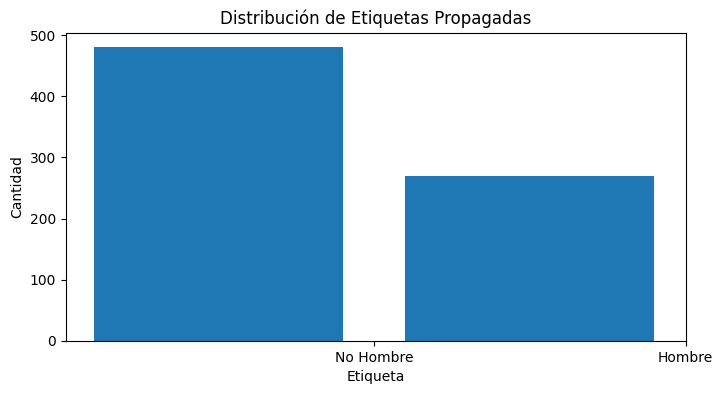

In [69]:
# Inicializar un arreglo vacío para las etiquetas propagadas, del mismo tamaño que X_train
y_train_propagated = np.empty(len(X_train), dtype=int)

# Propagar las etiquetas de las imágenes representativas a las imágenes de entrenamiento
for i in range(k):
    # Asignar la etiqueta de la imagen representativa al grupo correspondiente de imágenes
    y_train_propagated[kmeans.labels_ == i] = y_representative[i]

# Visualizar la distribución de etiquetas propagadas
plt.figure(figsize=(8, 4))  # Crear una figura para el histograma
plt.hist(y_train_propagated, bins=2, rwidth=0.8)  # Crear el histograma con 2 barras
plt.xticks([0, 1], ['No Hombre', 'Hombre'])  # Etiquetas para el eje X
plt.xlabel("Etiqueta")  # Etiqueta del eje X
plt.ylabel("Cantidad")  # Etiqueta del eje Y
plt.title("Distribución de Etiquetas Propagadas")  # Título del gráfico
plt.show()  # Mostrar el gráfico


### Entrenar con etiquetas propagadas.
#### Usando las etiquetas propagadas, entrenamos nuevamente el modelo para aprovechar más datos sin necesidad de etiquetado manual. Esto mejora el modelo, ya que ahora utiliza más imágenes con etiquetas derivadas automáticamente.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Crear el modelo OneVsRest con regresión logística
log_reg3 = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)  # Configuración del clasificador
)

# Entrenar el modelo con las primeras 1000 imágenes y sus etiquetas propagadas
log_reg3.fit(X_train_flat[:1000], y_train_propagated[:1000])

# Evaluar la precisión en el conjunto de prueba
propagated_accuracy = log_reg3.score(X_test.reshape(X_test.shape[0], -1), y_test)
print(f"Precisión con etiquetas propagadas: {propagated_accuracy * 100:.2f}%")  # Mostrar la precisión


Precisión con etiquetas propagadas: 64.80%


### Evaluación con gráfico de pastel.
#### Después de entrenar el modelo con las etiquetas propagadas, evaluamos su rendimiento en el conjunto de prueba y mostramos los aciertos y errores en un gráfico de pastel. Esto nos da una visión rápida de la eficacia del modelo.

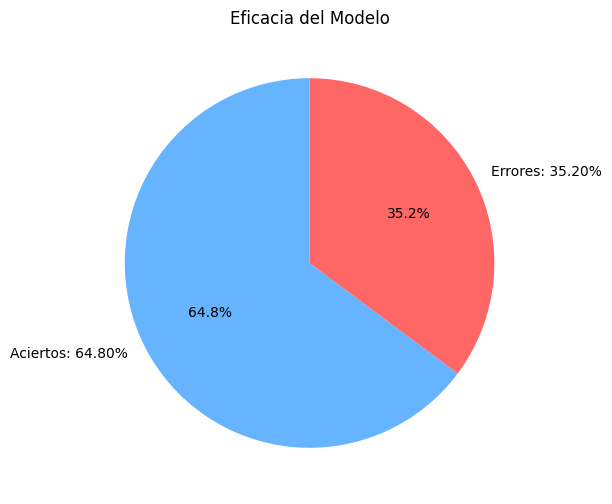

In [71]:
from sklearn.metrics import accuracy_score

# Predecir en el conjunto de prueba
y_pred = log_reg3.predict(X_test.reshape(X_test.shape[0], -1))  # Realiza las predicciones

# Calcular precisión y errores
accuracy = accuracy_score(y_test, y_pred)  # Calcula la precisión del modelo
errors = 1 - accuracy  # Calcula el porcentaje de errores

# Mostrar gráfico de pastel con la eficacia
plt.figure(figsize=(6, 6))  # Configura el tamaño de la figura
plt.pie(
    [accuracy, errors],  # Datos a graficar
    labels=[f"Aciertos: {accuracy * 100:.2f}%", f"Errores: {errors * 100:.2f}%"],  # Etiquetas
    autopct="%1.1f%%",  # Formato de porcentaje en el gráfico
    startangle=90,  # Ángulo inicial del gráfico de pastel
    colors=["#66b3ff", "#ff6666"],  # Colores para cada sección del gráfico
)
plt.title("Eficacia del Modelo")  # Título del gráfico
plt.show()  # Muestra el gráfico


### Prediccion aleatorio de una imagen.
#### Seleccionamos una imagen aleatoria del conjunto de prueba y mostramos la predicción del modelo junto con la etiqueta real. Esto nos permite evaluar manualmente si el modelo está realizando predicciones precisas en casos específicos.

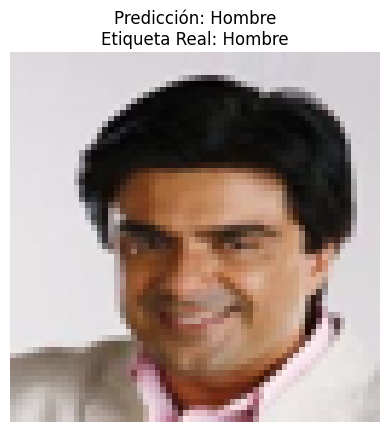

In [80]:
import random  # Importa el módulo random para la selección aleatoria

def predict_random_image(model, X_test, y_test):
    # Selecciona un índice aleatorio dentro del rango del conjunto de prueba
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx]  # Obtiene la imagen en el índice aleatorio
    true_label = y_test[idx]  # Obtiene la etiqueta real correspondiente

    # Preparar la imagen para la predicción (aplanar)
    img_flat = img.reshape(1, -1)  # Cambia la forma de la imagen a (1, número de píxeles)

    # Realiza la predicción utilizando el modelo
    pred_label = model.predict(img_flat)[0]  # Obtiene la etiqueta predicha

    # Mostrar imagen y predicción
    plt.imshow(img)  # Muestra la imagen
    plt.title(f"Predicción: {'Hombre' if pred_label == 1 else 'No Hombre'}\n"
              f"Etiqueta Real: {'Hombre' if true_label == 1 else 'No Hombre'}")  # Muestra el título con la predicción y etiqueta real
    plt.axis('off')  # Oculta los ejes
    plt.show()  # Muestra la figura

# Hacer una predicción aleatoria
predict_random_image(log_reg3, X_test, y_test)  # Llama a la función con el modelo y el conjunto de prueba


### Aprendizaje Activo
#### Selección de Predicciones con Baja Confianza
#### Calculamos la confianza de las predicciones del modelo y seleccionamos las imágenes con menor confianza. Estas imágenes tienen más probabilidades de estar mal clasificadas, por lo que requieren revisión manual para mejorar el modelo.

In [81]:
# Obtener las probabilidades de predicción del modelo
probas = log_reg3.predict_proba(X_train_flat[:1000])  # Obtiene las probabilidades de predicción para las primeras 1000 imágenes

# Obtener las etiquetas con la mayor probabilidad y sus índices
labels_ixs = np.argmax(probas, axis=1)  # Encuentra los índices de las etiquetas con la mayor probabilidad
confidences = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])  # Obtiene las probabilidades correspondientes

# Ordenar por menor confianza
sorted_ixs = np.argsort(confidences)  # Ordena los índices de las confianzas de menor a mayor

print("Confianzas más bajas:", confidences[sorted_ixs[:10]])  # Muestra las 10 confianzas más bajas


Confianzas más bajas: [0.77269901 0.77773745 0.8001115  0.80110227 0.80507661 0.81390564
 0.81856286 0.82265374 0.83000288 0.83453247]


### Visualización de imágenes con baja confianza.
#### Mostramos las imágenes con menor confianza para que puedan ser revisadas manualmente. Esta revisión ayuda a identificar los errores más críticos del modelo y a detectar patrones difíciles de clasificar.


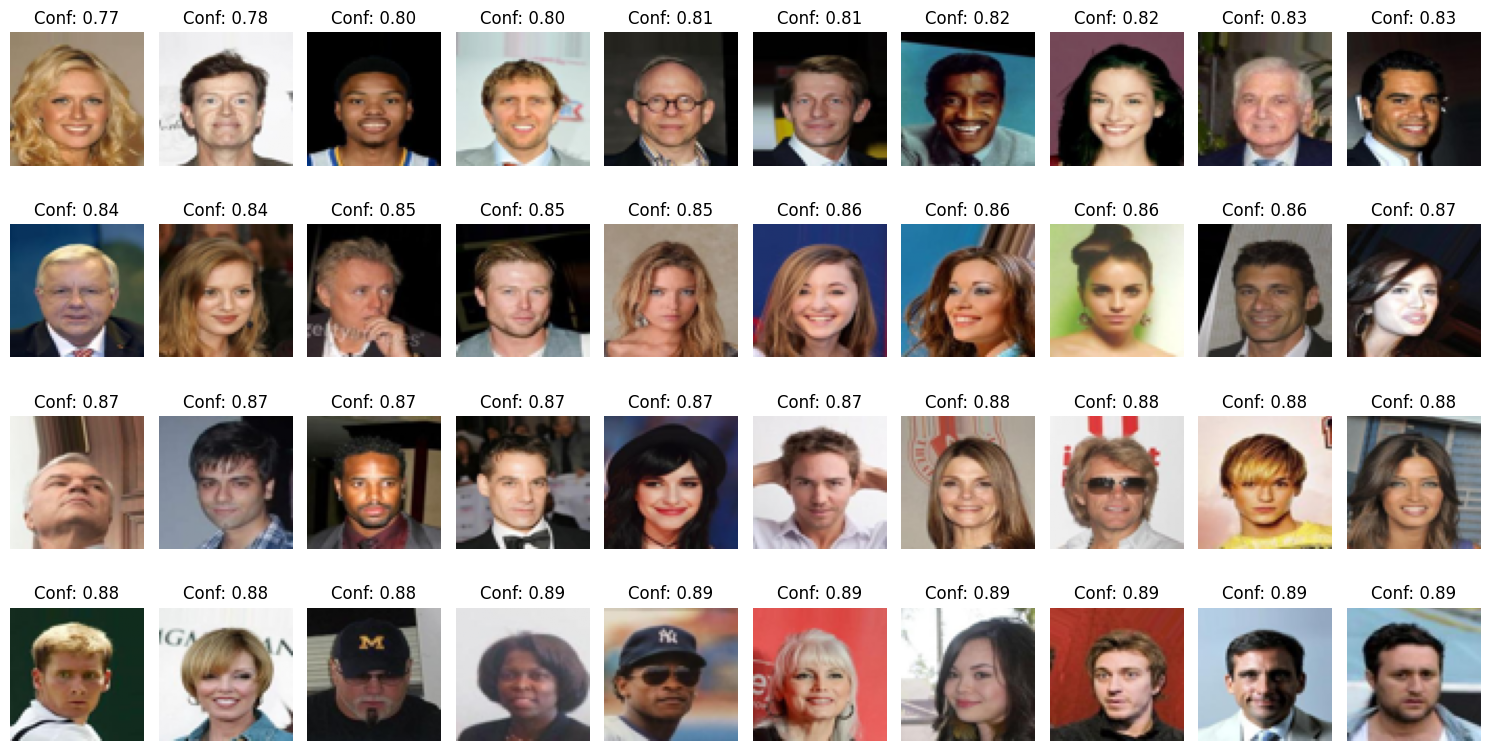

In [82]:
import matplotlib.pyplot as plt
import math

# Definir función para mostrar imágenes con menor confianza
def show_low_confidence_images(X_lowest_confidence, confidences, sorted_ixs, max_images=40):
    num_images = min(len(X_lowest_confidence), max_images)  # Determina cuántas imágenes mostrar
    cols = 10  # Número de columnas en la visualización
    rows = math.ceil(num_images / cols)  # Calcula el número de filas necesarias

    plt.figure(figsize=(15, rows * 2))  # Crea la figura con un tamaño adecuado
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)  # Crea un subgráfico para cada imagen
        plt.imshow(X_lowest_confidence[i])  # Muestra la imagen
        plt.title(f"Conf: {confidences[sorted_ixs[i]]:.2f}")  # Título con la confianza
        plt.axis('off')  # Oculta los ejes

    plt.tight_layout()  # Ajusta el diseño para que no haya solapamiento
    plt.show()  # Muestra la figura

# Obtener las imágenes con menor confianza
X_lowest_confidence = X_train[sorted_ixs[:k]]  # Utiliza los índices ordenados para seleccionar las imágenes

# Mostrar las imágenes con menor confianza
show_low_confidence_images(X_lowest_confidence, confidences, sorted_ixs)


### Obtener etiquetas reales para las imágenes con baja confianza.
#### Aquí se imprimen las etiquetas reales de las imágenes identificadas como de baja confianza. Esto permite comparar las predicciones del modelo con las etiquetas correctas y determinar si es necesario realizar ajustes en las etiquetas.

In [83]:
# Obtener las etiquetas reales de las imágenes con menor confianza
y_lowest = y_train[sorted_ixs[:k]]  # Selecciona las etiquetas correspondientes a las imágenes de menor confianza
print("Etiquetas reales de las imágenes con menor confianza:", y_lowest)  # Imprime las etiquetas


Etiquetas reales de las imágenes con menor confianza: [-1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1
 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1
  1 -1]


### Ajustar etiquetas propagadas.
#### Si las etiquetas propagadas no coinciden con las etiquetas reales, las ajustamos manualmente para mejorar la precisión del modelo. Este ajuste es clave para mejorar el rendimiento sin necesidad de etiquetar todo el dataset desde cero.

In [84]:
# Crear una copia de las etiquetas propagadas
y_train2 = y_train_propagated[:1000].copy()

# Ajustar las etiquetas propagadas con las etiquetas reales
y_train2[sorted_ixs[:k]] = y_lowest

### Re-entrenar el Modelo con Etiquetas Ajustadas
#### Después de ajustar las etiquetas, re-entrenamos el modelo para integrar las etiquetas corregidas. Esto permite que el modelo aprenda de los errores previos y mejore su precisión en futuras predicciones.


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import time

# Crear el modelo OneVsRest con regresión logística
log_reg5 = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
)

# Medir el tiempo de entrenamiento
start_time = time.time()
log_reg5.fit(X_train_flat[:1000], y_train2)  # Entrenar el modelo con un subconjunto de datos
print(f"Tiempo de entrenamiento: {time.time() - start_time:.2f} segundos")  # Imprimir el tiempo transcurrido

# Evaluar la precisión del modelo ajustado
accuracy = log_reg5.score(X_test.reshape(X_test.shape[0], -1), y_test)  # Evaluar precisión en el conjunto de prueba
print(f"Precisión del modelo ajustado: {accuracy * 100:.2f}%")  # Imprimir precisión


Tiempo de entrenamiento: 5.49 segundos
Precisión del modelo ajustado: 68.00%


### Prueba aleatoria del modelo ajustado.
#### Seleccionamos otra imagen aleatoria del conjunto de prueba y mostramos la predicción del modelo ajustado junto con la etiqueta real. Esto nos permite verificar si el modelo ha mejorado después del ajuste de etiquetas.



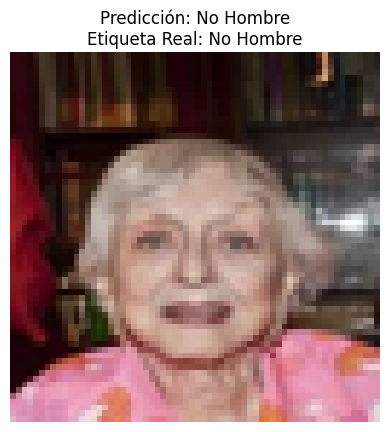

In [99]:
import random
import matplotlib.pyplot as plt

def predict_random_image(model, X_test, y_test):
    # Seleccionar un índice aleatorio de las imágenes de prueba
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx]  # Obtener la imagen correspondiente al índice
    true_label = y_test[idx]  # Obtener la etiqueta real correspondiente

    # Preparar la imagen para la predicción
    img_flat = img.reshape(1, -1)  # Aplanar la imagen
    pred_label = model.predict(img_flat)[0]  # Predecir la etiqueta con el modelo

    # Mostrar la imagen con la predicción y la etiqueta real
    plt.imshow(img)  # Mostrar la imagen
    plt.title(f"Predicción: {'Hombre' if pred_label == 1 else 'No Hombre'}\n"
              f"Etiqueta Real: {'Hombre' if true_label == 1 else 'No Hombre'}")  # Título con predicción y etiqueta real
    plt.axis('off')  # Ocultar ejes
    plt.show()  # Mostrar la figura

# Realizar una predicción aleatoria
predict_random_image(log_reg5, X_test, y_test)


### Evaluación Final con Gráfico de Pastel
#### Por último, mostramos un gráfico de pastel con los aciertos y errores del modelo ajustado. Esta evaluación final confirma si las mejoras aplicadas al modelo han incrementado su precisión.

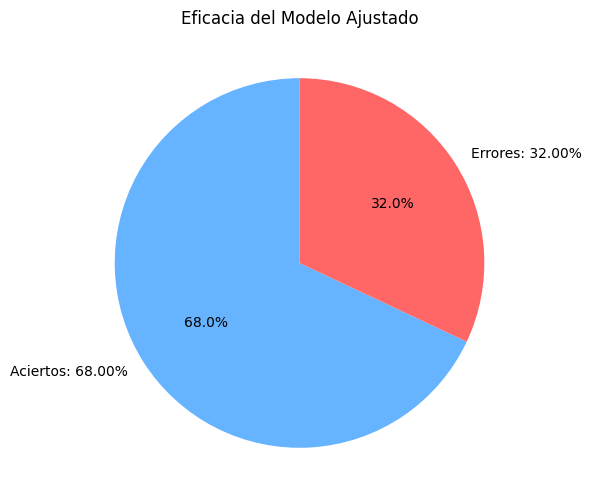

In [100]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_pred = log_reg5.predict(X_test.reshape(X_test.shape[0], -1))

# Calcular precisión y errores
accuracy = accuracy_score(y_test, y_pred)
errors = 1 - accuracy

# Graficar un pastel con la eficacia del modelo
plt.figure(figsize=(6, 6))
plt.pie(
    [accuracy, errors],
    labels=[f"Aciertos: {accuracy * 100:.2f}%", f"Errores: {errors * 100:.2f}%"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff6666"],
)
plt.title("Eficacia del Modelo Ajustado")
plt.show()


### PUNTO 3.
#### Buscar un dataset para otras técnicas de aprendizaje no supervisado.
#### DBSCAN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Aplicaremos el metodo del DBSCAN y el ajuste con KNN a un dataset de clientes en un centro comercial.

### Primero cargamos el dataset.

In [ ]:
# Reemplaza 'ruta/a/tu/archivo' con la ruta real de tu archivo en Google Drive
file_path = '/content/drive/MyDrive/datasets/Mall_Customers.csv'
# Lee el archivo CSV usando pandas
df = pd.read_csv(file_path)

In [ ]:
print(df.head(10))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### Seleccionamos las columnas "Annual Income (k$)" y "Spending Score (1-100)" del dataframe para asignarlas a la variable X.

In [ ]:
X = df.iloc[:, [3, 4]].values

### Aplicamos el algoritmo DBSCAN para identificar clústeres en los datos y muestra las etiquetas de los grupos detectados.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Crear el modelo DBSCAN con eps=5 (distancia máxima) y min_samples=5 (mínimo de puntos para formar un clúster)
dbscan = DBSCAN(eps=5, min_samples=5)

# Ajustamos el modelo a los datos seleccionados (X)
dbscan.fit(X)

# Mostramos las etiquetas de agrupamiento, donde -1 indica outliers
print(np.unique(dbscan.labels_))


[-1  0  1  2  3  4]


### Graficamos los clusteres creados por el algoritmo DBSCAN, mostrando los puntos agrupados y los outliers en un gráfico de dispersión.

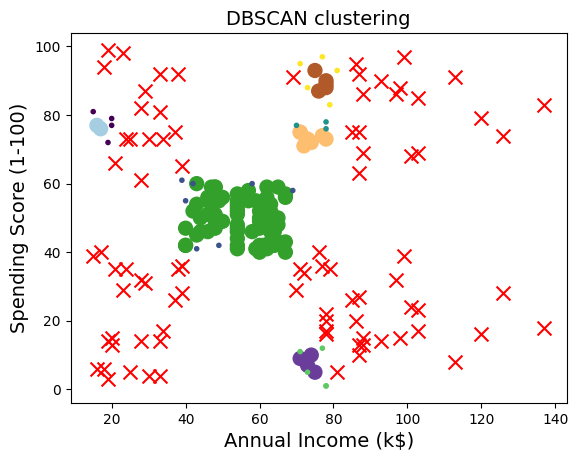

In [ ]:
import matplotlib.pyplot as plt

# Función para visualizar los resultados del agrupamiento DBSCAN
def plot_dbscan(dbscan, X, size=100, show_xlabels=True, show_ylabels=True):
    # Máscara para identificar los puntos centrales del clúster
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True

    # Máscara para identificar las anomalías (puntos que no pertenecen a ningún clúster)
    anomalies_mask = dbscan.labels_ == -1

    # Máscara para identificar los puntos que no son ni centrales ni anomalías
    non_core_mask = ~(core_mask | anomalies_mask)

    # Coordenadas de los puntos centrales (núcleos de los clústeres)
    cores = dbscan.components_

    # Coordenadas de los puntos detectados como anomalías
    anomalies = X[anomalies_mask]

    # Coordenadas de los puntos que no son núcleos (bordes)
    non_cores = X[non_core_mask]

    # Graficamos los puntos centrales con colores por clúster
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")

    # Graficamos los puntos que son anomalías (outliers) en rojo con un marcador 'x'
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)

    # Graficamos los puntos que no son núcleos ni anomalías
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")

    # Configuración de las etiquetas del eje X
    if show_xlabels:
        plt.xlabel("Annual Income (k$)", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    # Configuración de las etiquetas del eje Y
    if show_ylabels:
        plt.ylabel("Spending Score (1-100)", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

    # Título del gráfico
    plt.title("DBSCAN clustering", fontsize=14)

# Graficamos los clústeres identificados por DBSCAN
plot_dbscan(dbscan, X)
plt.show()


###  Entrenamos un modelo KNN utilizando los núcleos de los clústeres detectados por DBSCAN y luego predice a qué clúster podrían pertenecer nuevas muestras de datos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamos el clasificador KNN sobre los núcleos de los clústeres encontrados por DBSCAN
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustamos el modelo KNN con los núcleos (puntos centrales) de los clústeres identificados por DBSCAN
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# Nuevas muestras a clasificar (en este caso tres puntos de ejemplo con ingresos anuales y puntaje de gasto)
X_new = np.array([[50, 80], [100, 20], [75, 50]])

# Predicción de a qué clúster pertenecen estas nuevas muestras
predictions = knn.predict(X_new)
print(predictions)  # Imprimimos las predicciones de clúster para las nuevas muestras

# Probabilidades de pertenencia de cada muestra a los clústeres
probabilities = knn.predict_proba(X_new)
print(probabilities)  # Imprimimos las probabilidades de pertenencia a cada clúster


[1 3 1]
[[0.  0.8 0.2 0.  0. ]
 [0.  0.2 0.  0.8 0. ]
 [0.  1.  0.  0.  0. ]]


### Graficamos aumentando las nuevas muestras (marcadas en azul) sobre los clústeres previamente identificados por el modelo DBSCAN.

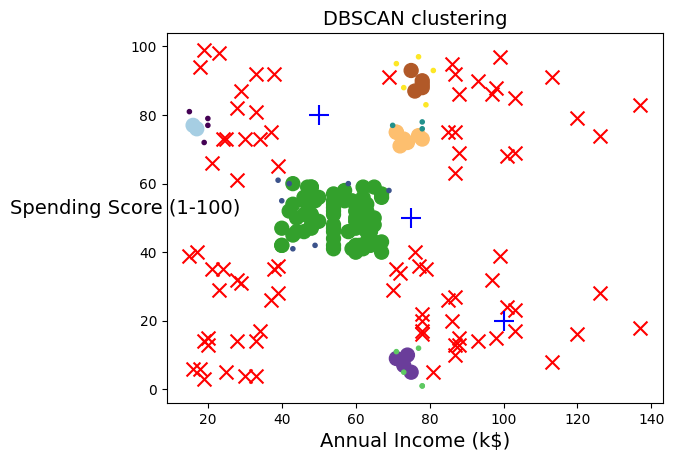

In [ ]:
# Visualizamos las nuevas muestras sobre los clústeres
plot_dbscan(dbscan, X)

# Graficamos las nuevas muestras en azul
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()


### Para una mejor practica aplicaremos DBSCAN y KNN a otro dataset que es de alturas y pesos.

In [4]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/datasets/Clustering_gmm (2).csv")
data.head()

Weight      Height
0  67.062924  176.086355
1  68.804094  178.388669
2  60.930863  170.284496
3  59.733843  168.691992
4  65.431230  173.763679

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
X = data.iloc[:, [0, 1]].values

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
# creamos el modelo dbscan
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)
print(np.unique(dbscan.labels_))

[-1  0  1  2]


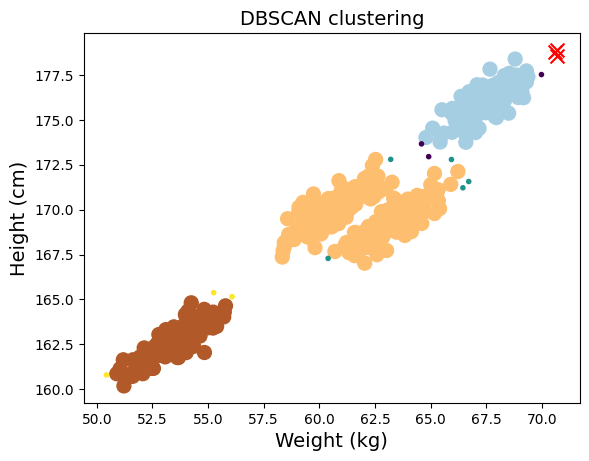

In [14]:
# Función para visualizar los resultados de DBSCAN
def plot_dbscan(dbscan, X, size=100, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    # Visualizamos los puntos centrales (núcleos), las anomalías y los puntos no núcleo
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")

    if show_xlabels:
        plt.xlabel("Weight (kg)", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("Height (cm)", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

    plt.title("DBSCAN clustering", fontsize=14)

# Graficamos los clústeres identificados
plot_dbscan(dbscan, X)
plt.show()


### Para predecir nuevas muestras de personas con un peso y una altura dados, podemos entrenar un modelo KNN sobre los núcleos de DBSCAN y predecir lo siguiente:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Entrenamos el clasificador KNN sobre los núcleos de los clústeres encontrados por DBSCAN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier()

In [21]:
# Nuevas muestras (por ejemplo, peso y altura de nuevas personas)
X_new = np.array([[53,161], [60,172], [70,175]])  # (Peso, Altura)

In [22]:
# Predicción de clúster para las nuevas muestras
predictions = knn.predict(X_new)
print(predictions)

# Probabilidades de pertenencia a cada clúster
probabilities = knn.predict_proba(X_new)
print(probabilities)

[2 1 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


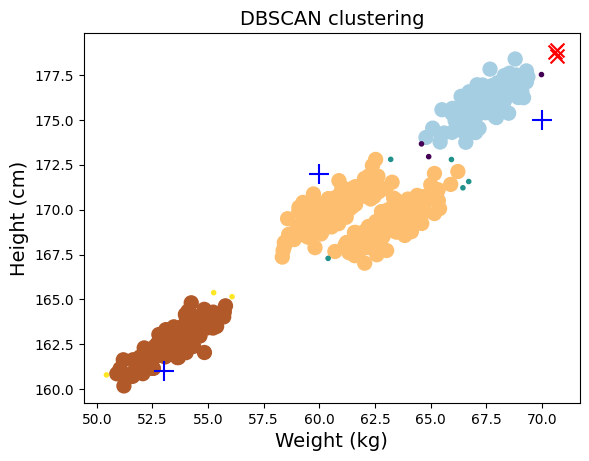

In [24]:
# Visualizamos las nuevas muestras sobre los clústeres
plot_dbscan(dbscan, X)
# Graficamos las nuevas muestras en azul
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

### De esta manera aplicamos correctamente el metodo de DBSCAN y KNN a 2 datasets y logramos entender mucho mejor.

### Gaussian Mixtures

### Usaremos el dataset de incendios forestales donde aplicaremos de 2 formas este metodo.
#### 1. Usando todas las caracteristicas de X y posteriormente redimensionandolos a solo dos para la visualizacion.
#### 2. Usando desde el inicio solo 2 componentes en X.
#### Comenzamos subiendo el dataset a usar.

In [71]:
df = pd.read_csv("/content/drive/MyDrive/datasets/forestfires.csv")
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### Seleccionamos columnas relevantes y escala los datos para normalizar las características.

In [88]:
# Seleccionar columnas relevantes
df_selected = df[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]

# Escalar los datos para que todas las características tengan un rango similar
from sklearn.preprocessing import StandardScaler  # Importa el escalador
scaler = StandardScaler()  # Crea una instancia del escalador
X_scaled = scaler.fit_transform(df_selected)  # Escala los datos seleccionados

# Ver las primeras filas de los datos escalados
X_scaled[:5]  # Muestra las primeras 5 filas del array escalado


array([[ 1.00831277,  0.56986043, -0.80595947, -1.32332557, -1.83047676,
        -0.86094557, -1.84264015,  0.41172435,  1.49861442, -0.07326831],
       [ 1.00831277, -0.24400101, -0.00810203, -1.17954077,  0.48889092,
        -0.50968827, -0.15327826, -0.69245628, -1.74175564, -0.07326831],
       [ 1.00831277, -0.24400101, -0.00810203, -1.04982188,  0.56071545,
        -0.50968827, -0.73938341, -0.69245628, -1.51828184, -0.07326831],
       [ 1.44092498,  1.38372188,  0.19136233, -1.21236122, -1.89826621,
        -0.0047559 , -1.82540176,  3.23351928, -0.00983371,  0.60315519],
       [ 1.44092498,  1.38372188, -0.24383264, -0.93104314, -1.79859958,
         0.12696559, -1.29101178,  3.35620602, -1.23893959, -0.07326831]])

### Creamos y ajustamos un modelo de Gaussian Mixture para clasificar los datos en clusters.

In [89]:
from sklearn.mixture import GaussianMixture  # Importa la clase GaussianMixture

# Crear el modelo Gaussian Mixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
# Inicializa el modelo con 3 clusters, 10 inicializaciones y una semilla para reproducibilidad

# Ajustar el modelo a los datos
gm.fit(X_scaled)  # Ajusta el modelo a los datos escalados

# Obtener las predicciones de cada muestra (a qué cluster pertenece)
y_pred = gm.predict(X_scaled)  # Predice el cluster para cada muestra en los datos escalados

# Visualizar los pesos, medias y covarianzas de cada cluster
print("Pesos:", gm.weights_)  # Imprime los pesos (proporciones) de cada cluster
print("Medias:", gm.means_)  # Imprime las medias de cada cluster
print("Covarianzas:", gm.covariances_)  # Imprime las matrices de covarianza de cada cluster


Pesos: [0.01740812 0.24865778 0.73393409]
Medias: [[ 0.86410871  0.47943138  0.5761875   0.66205073 -0.03504264  1.81739134
   0.11678979  1.62495985  0.9150995   4.13558903]
 [ 0.15531363  0.18614651 -0.89032394 -1.15406095 -1.45020353 -0.79512664
  -0.91792579  0.08049635  0.34608733 -0.07326831]
 [-0.07311618 -0.07443826  0.28797631  0.37529416  0.49216193  0.22628334
   0.30822427 -0.06581456 -0.13895999 -0.07326831]]
Covarianzas: [[[ 2.91128384e-01  2.60804736e-01 -9.00677507e-03 -1.52502665e-01
   -2.23504989e-01  1.91003008e-01 -1.30092579e-01  7.46992449e-02
   -1.08314597e-01  1.19219247e-01]
  [ 2.60804736e-01  5.07000609e-01 -6.19465319e-03 -9.70463203e-02
   -2.18511769e-01 -7.58362248e-01 -3.52819924e-01  3.64883969e-01
   -1.23496530e-01 -1.08743706e-01]
  [-9.00677507e-03 -6.19465319e-03  1.62270849e-01  1.00799648e-01
    1.10382242e-01  2.53316028e-01  2.19770968e-01 -2.12650511e-01
   -2.07579190e-01  8.32097060e-01]
  [-1.52502665e-01 -9.70463203e-02  1.00799648e-01 

### Reducimos las dimensiones de los datos para visualización y se grafica los clusters identificados por Gaussian Mixture.

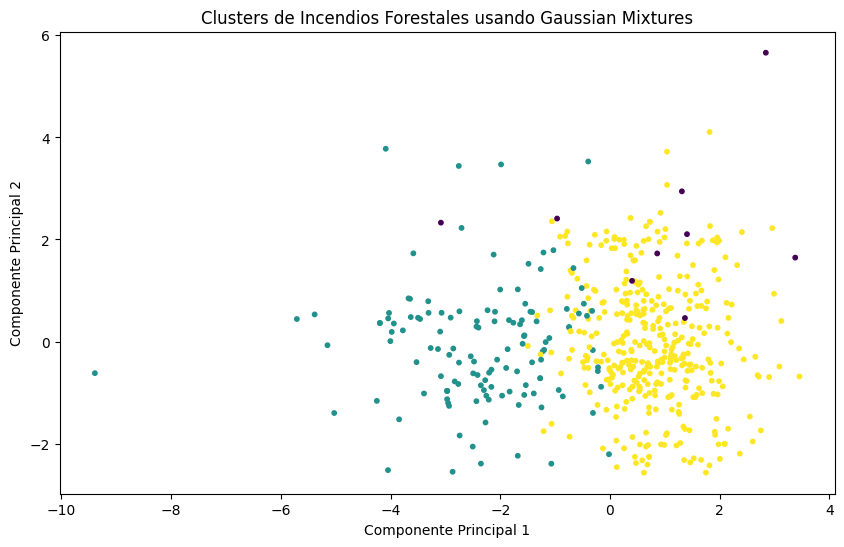

In [91]:
import matplotlib.pyplot as plt  # Importa la biblioteca para graficar
from sklearn.decomposition import PCA  # Importa PCA para la reducción de dimensiones
from sklearn.mixture import GaussianMixture  # Importa GaussianMixture

# Reducir las dimensiones a 2 componentes principales para la visualización
pca = PCA(n_components=2)  # Crea un objeto PCA para reducir a 2 dimensiones
X_reduced = pca.fit_transform(X_scaled)  # Ajusta y transforma los datos escalados

# Graficar los clusters
plt.figure(figsize=(10, 6))  # Define el tamaño de la figura
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', s=10)
# Crea un scatter plot con los datos reducidos, coloridos según los clusters

plt.title('Clusters de Incendios Forestales usando Gaussian Mixtures')  # Título de la gráfica
plt.xlabel('Componente Principal 1')  # Etiqueta del eje x
plt.ylabel('Componente Principal 2')  # Etiqueta del eje y
plt.show()  # Muestra la gráfica


### Calculamos las densidades de los datos, identificamos anomalías y las visualiza en un gráfico con clusters.

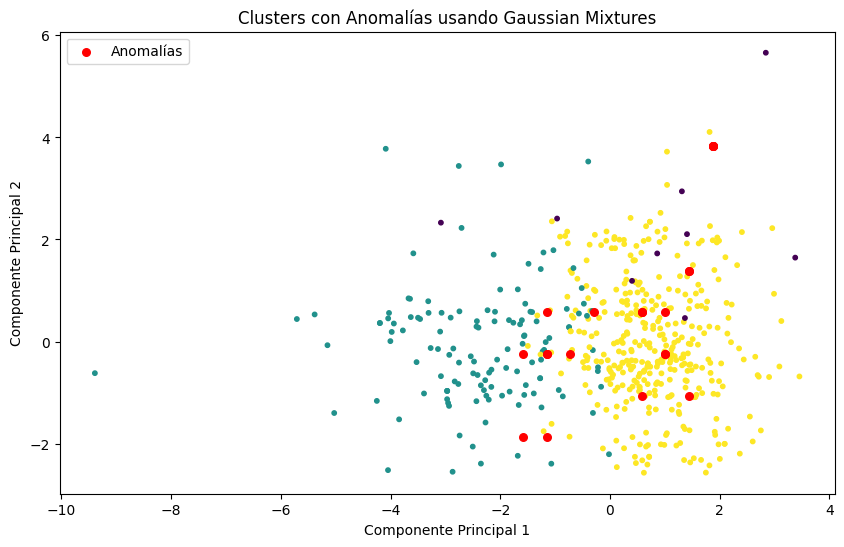

In [94]:
# Calcular las densidades
densities = gm.score_samples(X_scaled)  # Calcula la densidad de probabilidad de cada muestra en los datos escalados

# Definir un umbral para las anomalías (por ejemplo, el percentil 4)
density_threshold = np.percentile(densities, 4)  # Establece el umbral en el percentil 4 de las densidades

# Identificar los incendios que caen por debajo del umbral
anomalies = X_scaled[densities < density_threshold]  # Selecciona los datos que tienen densidad menor al umbral

# Visualizar las anomalías en el gráfico
plt.figure(figsize=(10, 6))  # Define el tamaño de la figura
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', s=10)
# Crea un scatter plot con los datos reducidos, coloridos según los clusters

plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', label='Anomalías', s=30)
# Agrega las anomalías al gráfico en rojo, con una etiqueta

plt.title('Clusters con Anomalías usando Gaussian Mixtures')  # Título de la gráfica
plt.xlabel('Componente Principal 1')  # Etiqueta del eje x
plt.ylabel('Componente Principal 2')  # Etiqueta del eje y
plt.legend()  # Muestra la leyenda
plt.show()  # Muestra la gráfica


### Aqui hacemos usando solo 2 caracteristicas (temperratura y viento) para no llegar a redimensionar. mas adelante.

In [106]:
# Seleccionar las características 'temp' (temperatura) y 'wind' (viento)
X = df[['temp', 'wind']].values


In [107]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Ajustamos un modelo de Gaussian Mixture con 3 componentes a los datos escalados.

In [108]:
# Ajustar el modelo de Gaussian Mixture con 3 componentes (puedes ajustar según sea necesario)
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_scaled)

y_pred = gm.predict(X_scaled)
print(y_pred)

[1 2 2 1 2 0 0 2 1 0 1 0 1 2 0 0 1 0 0 1 2 2 0 0 0 1 0 2 0 0 0 1 2 0 2 0 0
 1 0 2 0 1 0 2 1 0 2 0 2 1 2 2 0 0 0 2 0 2 1 2 1 1 0 2 0 0 0 0 1 0 1 0 1 0
 2 2 2 2 2 1 1 2 0 2 0 2 2 2 0 0 1 0 1 0 2 2 2 0 1 0 0 1 0 0 2 1 2 2 2 0 1
 0 0 2 1 1 1 0 1 2 2 0 0 2 0 0 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 0 1 0 0 0 1 0
 1 0 0 2 2 0 0 2 2 0 0 0 2 0 1 2 2 1 2 0 1 2 2 0 0 2 2 0 1 2 2 1 1 0 2 0 0
 2 1 2 2 1 1 2 0 0 0 0 1 2 1 0 2 2 2 2 0 2 1 2 1 0 2 1 0 1 0 0 2 1 2 2 2 0
 1 2 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 2 2 0 1 1 0 0 2 0 2 0 0 0 2 2 0 2 2 2
 2 0 1 2 0 2 1 0 0 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 2 1 0 1 2 2 2 2 2 2 0 0 2
 2 2 0 2 0 0 0 0 1 2 0 0 2 2 2 2 1 0 2 2 0 0 2 0 1 0 0 2 2 0 0 2 2 0 0 0 2
 2 0 2 2 2 2 2 2 2 2 0 1 2 2 1 0 2 1 1 0 2 2 0 0 2 2 2 2 0 2 2 2 2 1 2 0 1
 1 1 2 2 1 0 2 2 1 2 1 2 2 2 0 2 0 1 0 0 1 2 0 1 2 2 0 0 0 0 0 0 0 0 2 2 0
 1 2 0 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 2 2 2 0 0 0 0 1 0 0 2 2 2 0 2 2 2 2 1
 2 0 2 1 1 0 0 1 0 2 2 2 2 0 0 1 0 0 1 1 1 2 1 1 2 1 1 0 0 0 2 1 2 0 0 0 0
 0 0 0 0 0 0 0 1 2 0 0 2 

### Creamos una funcion para visualizar las áreas de los clusters y graficar los puntos del dataset con sus respectivas etiquetas.

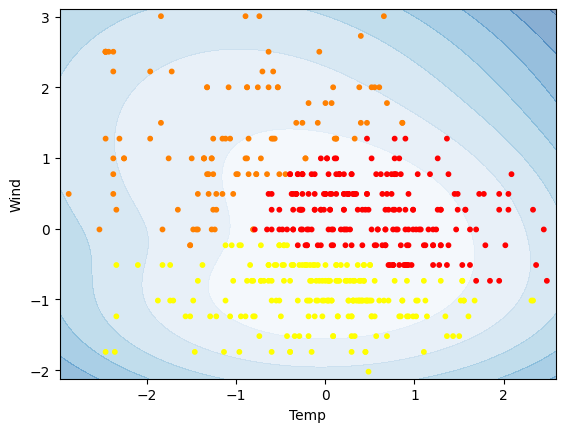

In [109]:

# Crear una malla para visualizar las áreas del cluster
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1  # Calcula el mínimo de cada característica y le resta 0.1
    maxs = X.max(axis=0) + 0.1  # Calcula el máximo de cada característica y le suma 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),  # Crea una malla de valores para la característica 'temp'
                         np.linspace(mins[1], maxs[1], resolution))  # Crea una malla de valores para la característica 'wind'

    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])  # Calcula las densidades de probabilidad para cada punto en la malla
    Z = Z.reshape(xx.shape)  # Reorganiza la matriz Z a la forma de la malla

    plt.contourf(xx, yy, Z, cmap="Blues", alpha=0.5)  # Grafica las áreas de densidad con contornos suaves
    plt.scatter(X[:, 0], X[:, 1], c=clusterer.predict(X), s=10, cmap='autumn')  # Grafica los puntos del dataset y colorea según el cluster
    plt.xlabel("Temp")  # Etiqueta del eje X
    plt.ylabel("Wind")  # Etiqueta del eje Y
    plt.show()  # Muestra la gráfica

# Visualizar los clusters usando las dos características
plot_gaussian_mixture(gm, X_scaled)  # Llama a la función para graficar los clusters basados en el modelo ajustado


In [110]:
# Generar nuevas muestras basadas en el modelo entrenado
X_new, y_new = gm.sample(5)
print("Nuevas muestras generadas:", X_new)

# Asignar cada nueva muestra a un clúster
cluster_assignments = gm.predict(X_new)

# Imprimir las asignaciones de clúster
for i in range(len(X_new)):
    print(f'Muestra {X_new[i]} asignada al clúster {cluster_assignments[i]}')


Nuevas muestras generadas: [[ 0.37257293  1.1774495 ]
 [-0.53883057  0.56922963]
 [-1.59808655  2.51102543]
 [ 0.09236587  0.96107741]
 [ 0.41562354 -1.08148289]]
Muestra [0.37257293 1.1774495 ] asignada al clúster 0
Muestra [-0.53883057  0.56922963] asignada al clúster 0
Muestra [-1.59808655  2.51102543] asignada al clúster 1
Muestra [0.09236587 0.96107741] asignada al clúster 0
Muestra [ 0.41562354 -1.08148289] asignada al clúster 2


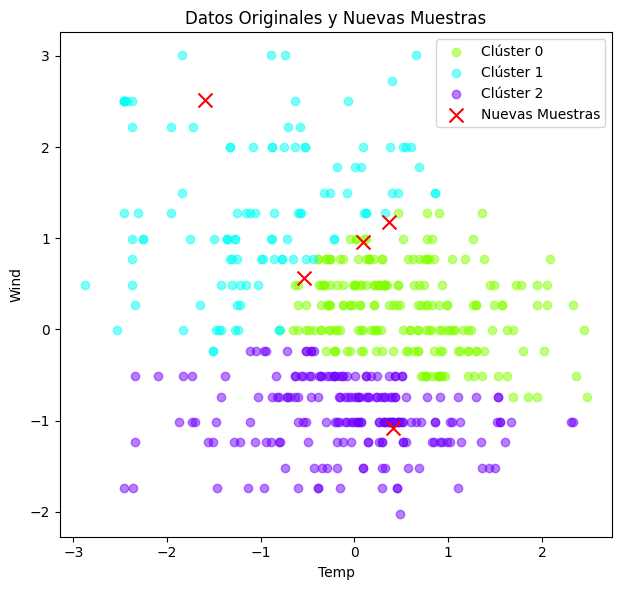

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asignar etiquetas de clúster a los datos originales
original_clusters = gm.predict(X_scaled)

# Visualizar las muestras originales y las nuevas muestras generadas
plt.figure(figsize=(12, 6))

# Graficar los datos originales con colores según el clúster
plt.subplot(1, 2, 1)
unique_clusters = set(original_clusters)  # Obtener los clústeres únicos
colors = sns.color_palette("hsv", len(unique_clusters))  # Generar una paleta de colores

for cluster in unique_clusters:
    # Graficar solo los datos que pertenecen al clúster actual
    plt.scatter(X_scaled[original_clusters == cluster, 0],
                X_scaled[original_clusters == cluster, 1],
                color=colors[cluster],
                label=f'Clúster {cluster}',
                alpha=0.5)

# Graficar las nuevas muestras en rojo
plt.scatter(X_new[:, 0], X_new[:, 1], c='red', label='Nuevas Muestras', marker='x', s=100)
plt.title('Datos Originales y Nuevas Muestras')
plt.xlabel('Temp')
plt.ylabel('Wind')
plt.legend()

plt.tight_layout()
plt.show()


### detectamos y visualizamos anomalías  utilizando un modelo de mezcla gaussiana. Las anomalías se definen como muestras que tienen una densidad significativamente baja.

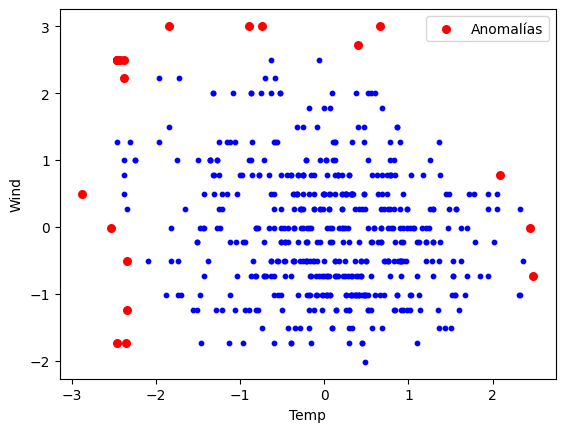

In [112]:
# Detectar las densidades de los datos
densities = gm.score_samples(X_scaled)

# Umbral para detectar anomalías (por ejemplo, el percentil 4)
density_threshold = np.percentile(densities, 4)

# Detectar las anomalías
anomalies = X_scaled[densities < density_threshold]

# Visualizar las anomalías
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', s=10)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=30, label='Anomalías')
plt.xlabel('Temp')
plt.ylabel('Wind')
plt.legend()
plt.show()
